In [36]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import chi2_contingency

In [8]:
data = pd.read_csv(r"C:\Users\Prathamesh\OneDrive\Desktop\Unified Mentor\Heartdata.csv")

print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [10]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
data = data[data['ca'] < 4] 
data = data[data['thal'] > 0] 
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 1000 instead of 303!


In [18]:
#renaming 

data = data.rename(
    columns={
        'cp': 'chest_pain_type',
        'trestbps': 'resting_blood_pressure',
        'chol': 'cholesterol',
        'fbs': 'fasting_blood_sugar',
        'restecg': 'rest_ecg',
        'thalach': 'max_heart_rate',
        'exang': 'exercise_induced_angina',
        'oldpeak': 'st_depression',
        'slope': 'st_slope',
        'ca': 'num_major_vessels',
        'thal': 'thalassemia'
    }
)

print(data.head())

print(data.columns)

   age     sex chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    male  typical angina                     125          212   
1   53    male  typical angina                     140          203   
2   70    male  typical angina                     145          174   
3   61    male  typical angina                     148          203   
4   62  female  typical angina                     138          294   

     fasting_blood_sugar resting_electrocardiogram  max_heart_rate_achieved  \
0    lower than 120mg/ml     ST-T wave abnormality                      168   
1  greater than 120mg/ml                    normal                      155   
2    lower than 120mg/ml     ST-T wave abnormality                      125   
3    lower than 120mg/ml     ST-T wave abnormality                      161   
4  greater than 120mg/ml     ST-T wave abnormality                      106   

  exercise_induced_angina  st_depression     st_slope  num_major_vessels  \
0                     

In [22]:


# Renaming columns
data = data.rename(
    columns={
        'cp': 'chest_pain_type',
        'trestbps': 'resting_blood_pressure',
        'chol': 'cholesterol',
        'fbs': 'fasting_blood_sugar',
        'restecg': 'resting_electrocardiogram',
        'thalach': 'max_heart_rate_achieved',
        'exang': 'exercise_induced_angina',
        'oldpeak': 'st_depression',
        'slope': 'st_slope',
        'ca': 'num_major_vessels',
        'thal': 'thalassemia'
    }
)

# Replacing numerical values with string labels
data.loc[data['sex'] == 0, 'sex'] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'

data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'typical angina'
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'asymptomatic'

data.loc[data['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
data.loc[data['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'

data.loc[data['resting_electrocardiogram'] == 0, 'resting_electrocardiogram'] = 'normal'
data.loc[data['resting_electrocardiogram'] == 1, 'resting_electrocardiogram'] = 'ST-T wave abnormality'
data.loc[data['resting_electrocardiogram'] == 2, 'resting_electrocardiogram'] = 'left ventricular hypertrophy'

data.loc[data['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'no'
data.loc[data['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'yes'

data.loc[data['st_slope'] == 0, 'st_slope'] = 'upsloping'
data.loc[data['st_slope'] == 1, 'st_slope'] = 'flat'
data.loc[data['st_slope'] == 2, 'st_slope'] = 'downsloping'

data.loc[data['thalassemia'] == 1, 'thalassemia'] = 'fixed defect'
data.loc[data['thalassemia'] == 2, 'thalassemia'] = 'normal'
data.loc[data['thalassemia'] == 3, 'thalassemia'] = 'reversible defect'

# Display the first few rows of the DataFrame after replacements
print(data.head())


   age     sex chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    male  typical angina                     125          212   
1   53    male  typical angina                     140          203   
2   70    male  typical angina                     145          174   
3   61    male  typical angina                     148          203   
4   62  female  typical angina                     138          294   

     fasting_blood_sugar resting_electrocardiogram  max_heart_rate_achieved  \
0    lower than 120mg/ml     ST-T wave abnormality                      168   
1  greater than 120mg/ml                    normal                      155   
2    lower than 120mg/ml     ST-T wave abnormality                      125   
3    lower than 120mg/ml     ST-T wave abnormality                      161   
4  greater than 120mg/ml     ST-T wave abnormality                      106   

  exercise_induced_angina  st_depression     st_slope  num_major_vessels  \
0                     

In [23]:
# Group columns by data type
columns_by_type = data.columns.to_series().groupby(data.dtypes).groups

# Print columns grouped by data type
for dtype, columns in columns_by_type.items():
    print(f"Columns with data type {dtype}:")
    for column in columns:
        print(f"- {column}")
    print()


Columns with data type int64:
- age
- resting_blood_pressure
- cholesterol
- max_heart_rate_achieved
- num_major_vessels
- target

Columns with data type float64:
- st_depression

Columns with data type object:
- sex
- chest_pain_type
- fasting_blood_sugar
- resting_electrocardiogram
- exercise_induced_angina
- st_slope
- thalassemia



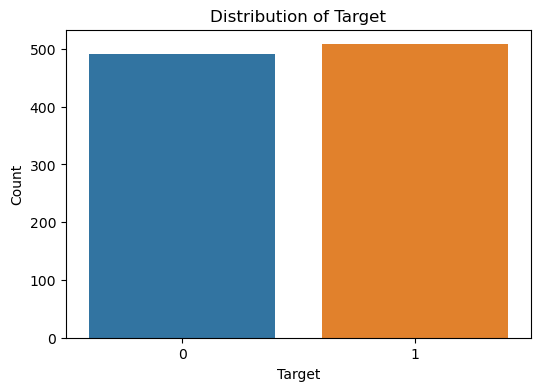

Target Distribution Summary:
count    1000.000000
mean        0.508000
std         0.500186
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64


In [26]:


# Statistical summary of the target column
target_summary = data['target'].describe()

# Distribution of the target column
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Print target distribution details
print("Target Distribution Summary:")
print(target_summary)


In [28]:
# Get the statistical summary of numerical features
numerical_summary = data.describe()


key_figures = numerical_summary.loc[['mean', 'std', 'min', '50%', 'max']]


print("Key Figures for Numerical Features:")
print(key_figures)


Key Figures for Numerical Features:
            age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
mean  54.607000              131.592000   246.996000               148.977000   
std    9.037822               17.714326    51.700802                23.083139   
min   29.000000               94.000000   126.000000                71.000000   
50%   56.000000              130.000000   240.500000               152.000000   
max   77.000000              200.000000   564.000000               202.000000   

      st_depression  num_major_vessels    target  
mean       1.092400           0.701000  0.508000  
std        1.180727           0.944718  0.500186  
min        0.000000           0.000000  0.000000  
50%        0.800000           0.000000  1.000000  
max        6.200000           3.000000  1.000000  


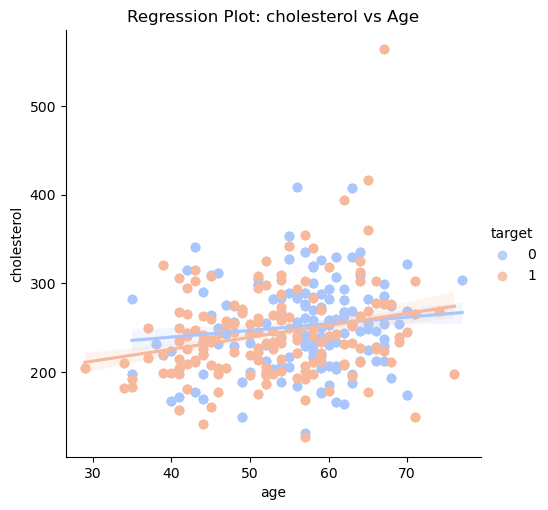

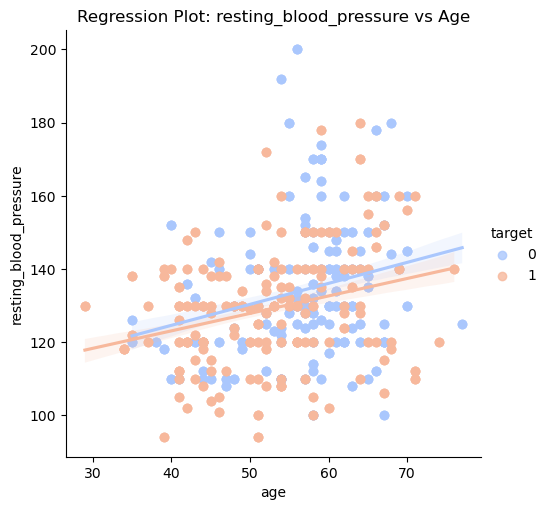

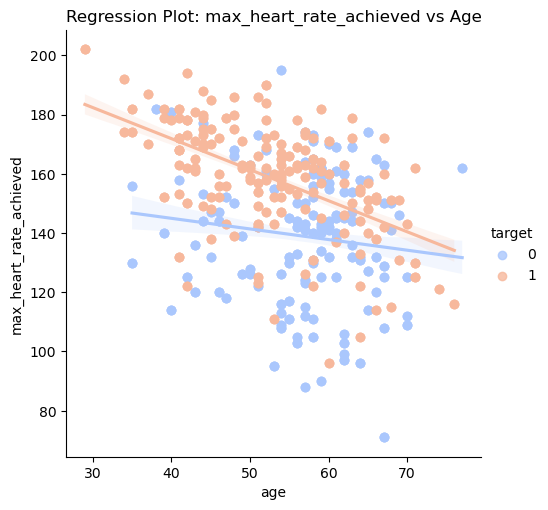

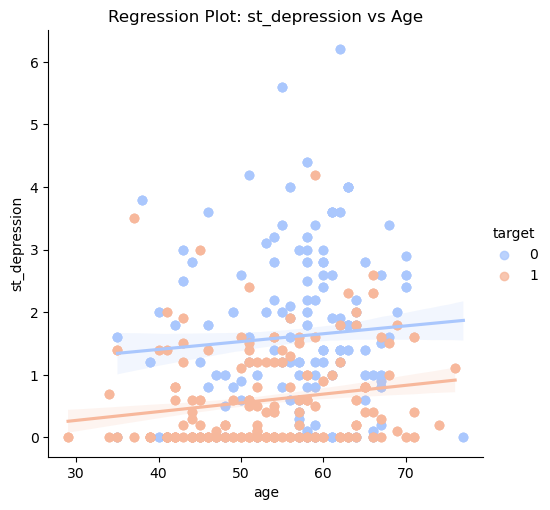

In [33]:
selected_features = ['cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression']


for feature in selected_features:
    sns.lmplot(x='age', y=feature, data=data, hue='target', palette='coolwarm')
    plt.title(f'Regression Plot: {feature} vs Age')
    plt.show()

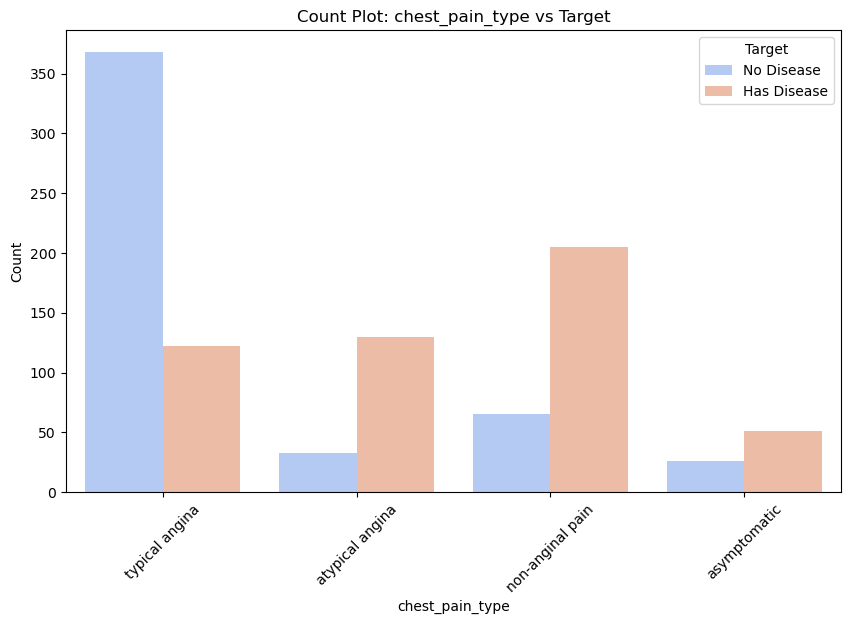

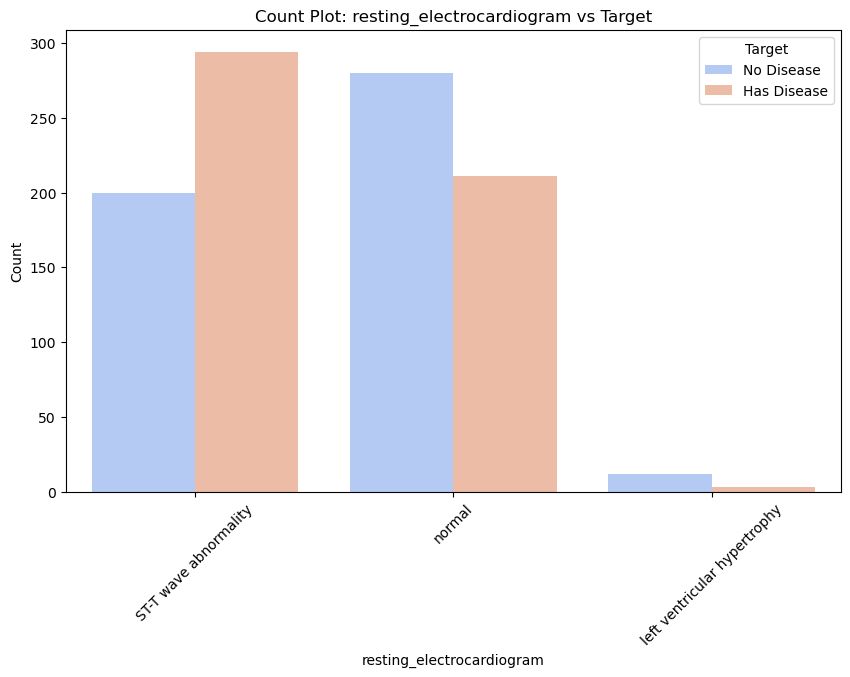

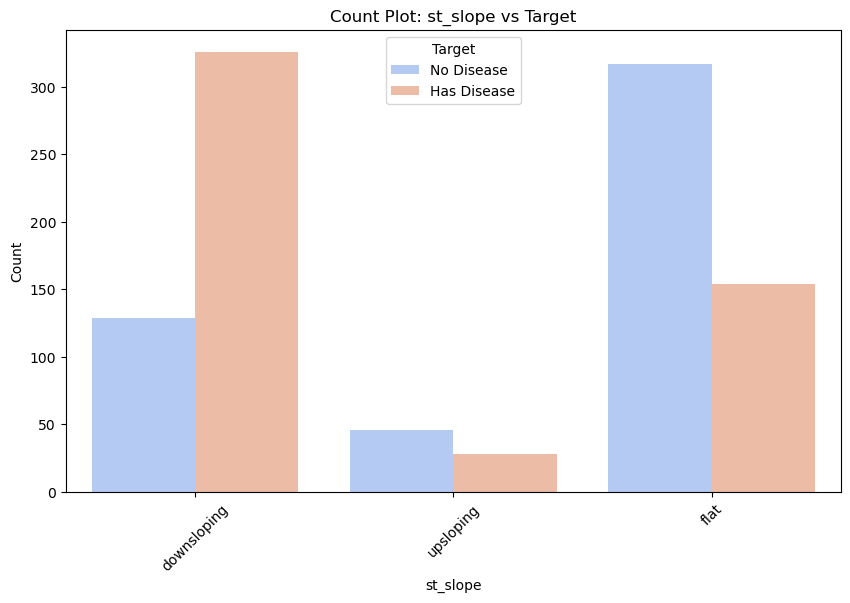

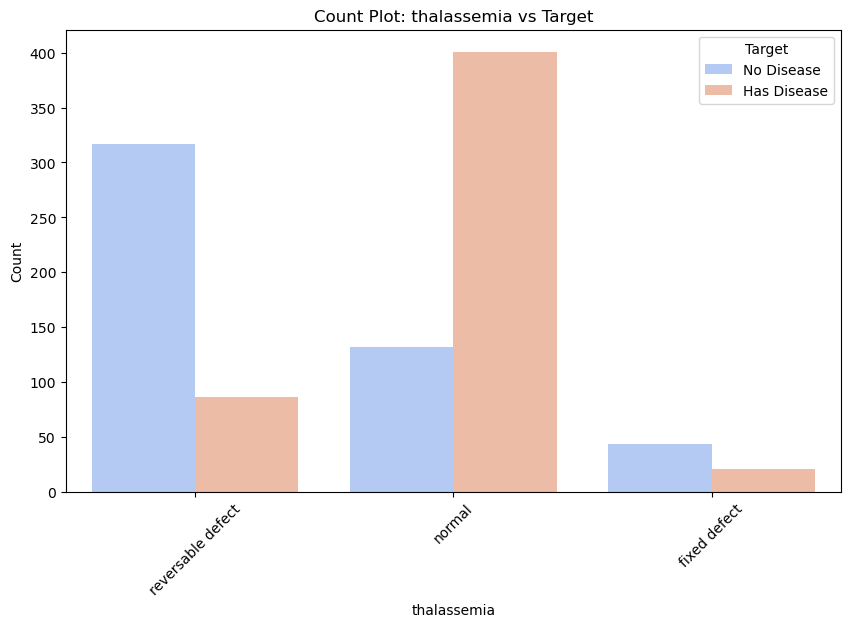

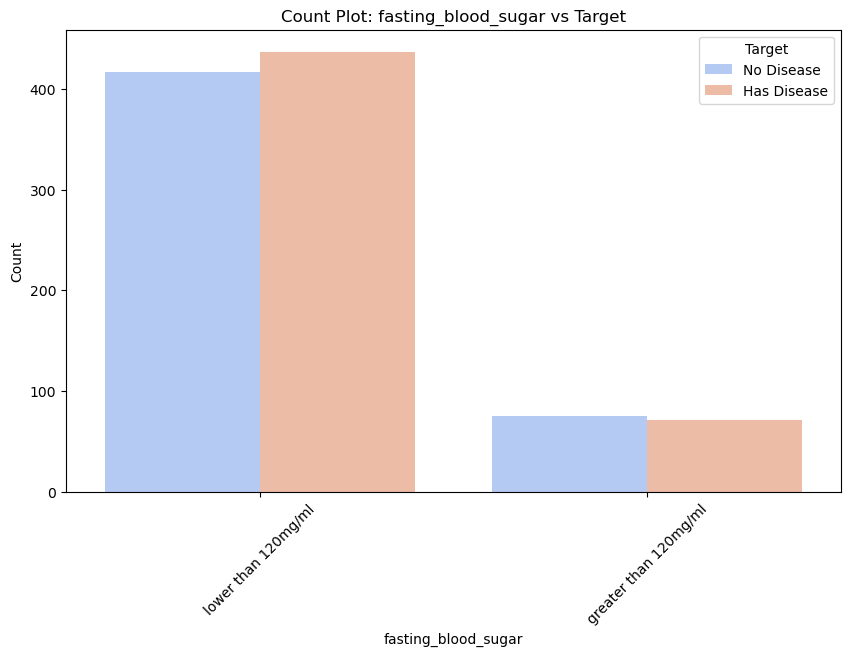

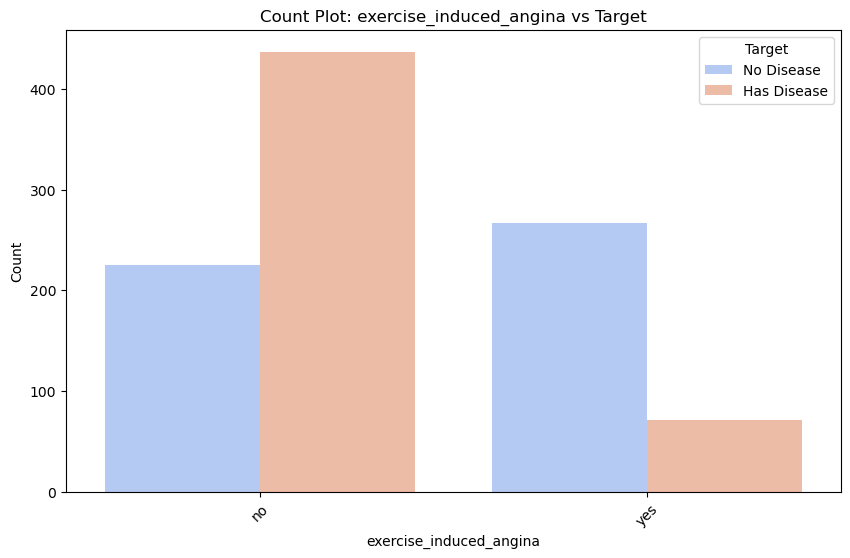

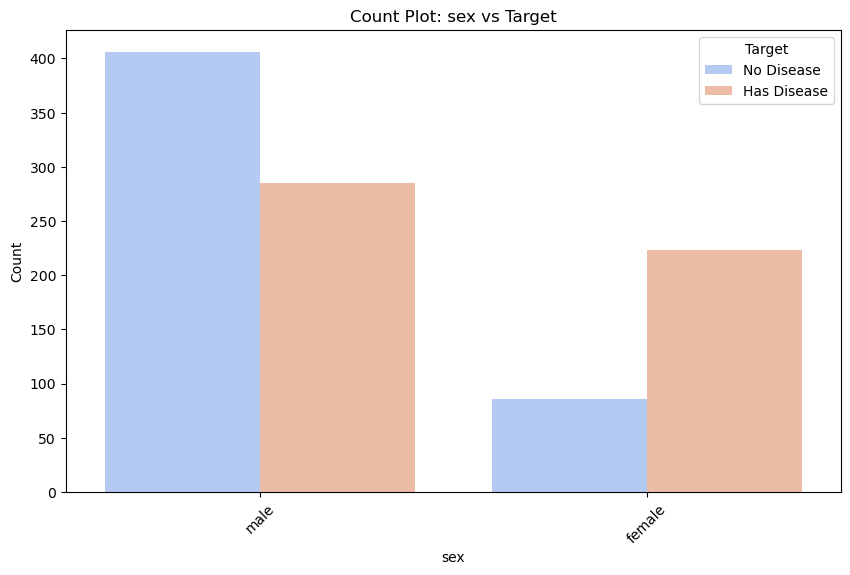

In [35]:
# Convert 'target' to string
data['target'] = data['target'].astype(str)

# Create count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, hue='target', palette='coolwarm')
    plt.title(f'Count Plot: {feature} vs Target')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No Disease', 'Has Disease'])
    plt.xticks(rotation=45)
    plt.show()


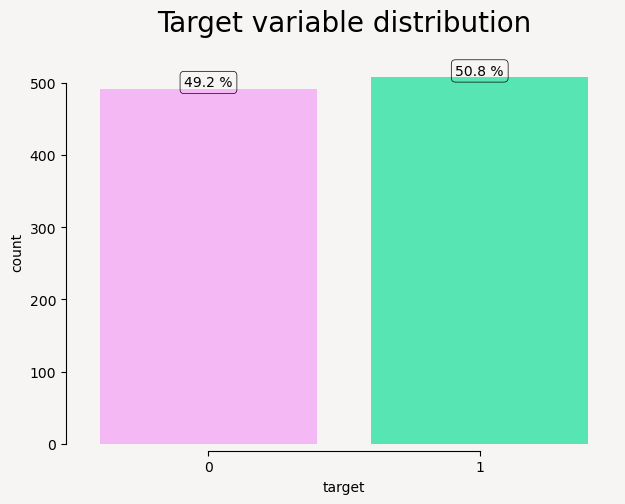

In [44]:
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f} %'.format((height/total)*100), ha="center", bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)
plt.show()

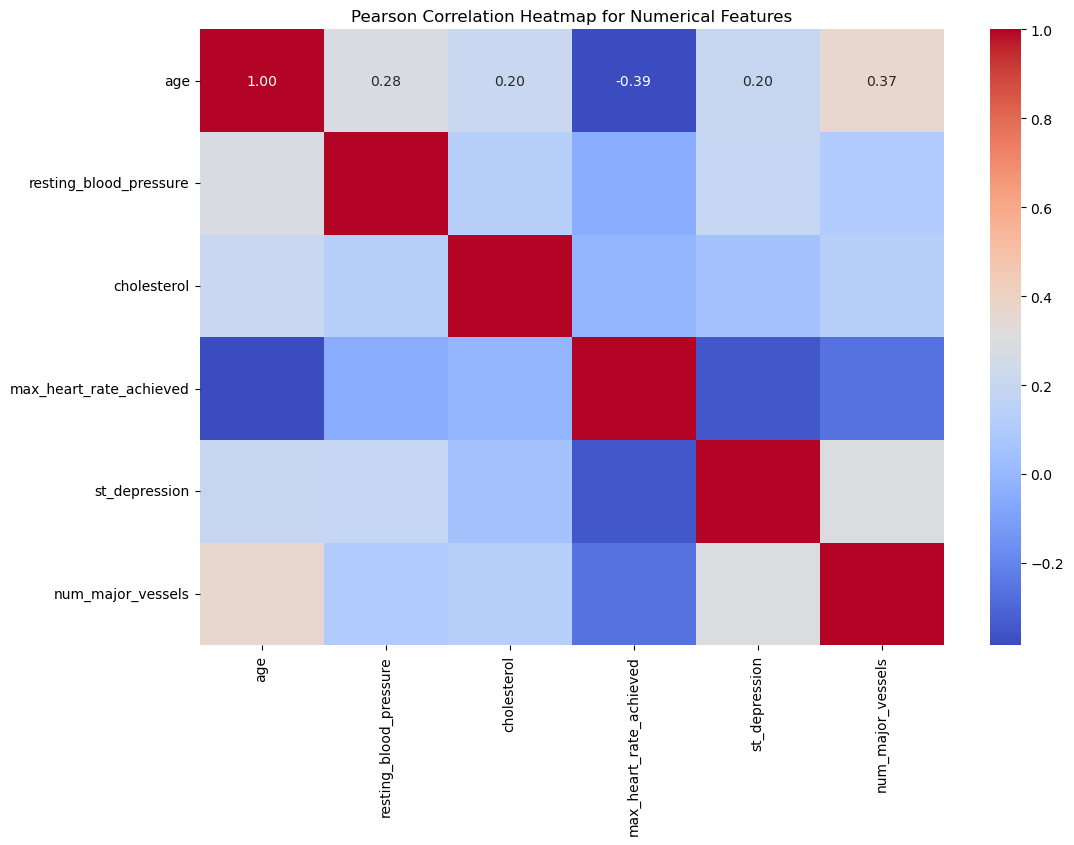

In [38]:
# Selecting only the numerical features
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# Creating the correlation heatmap for numerical features only
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 10})
plt.title('Pearson Correlation Heatmap for Numerical Features')
plt.show()


In [40]:
# Convert 'target' to numeric if it's not already
data['target'] = pd.to_numeric(data['target'])

# Calculate point-biserial correlation
point_biserial_corr, p_value = pointbiserialr(data['target'], data['age'])

print(f"Point-biserial correlation: {point_biserial_corr:.2f}")
print(f"P-value: {p_value:.2f}")


Point-biserial correlation: -0.23
P-value: 0.00


In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example categorical variables
variable1 = data['chest_pain_type']
variable2 = data['resting_electrocardiogram']

# Create a contingency table
contingency_table = pd.crosstab(variable1, variable2)

# Calculate Cramer's V
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
r_corr = r - ((r-1)**2)/(n-1)
k_corr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

print(f"Cramer's V correlation: {cramers_v:.2f}")
print(f"P-value: {p:.2f}")


Cramer's V correlation: 0.11
P-value: 0.00
